In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/home/ignis/Downloads/shalini.csv")
df

,Hours,Scores
0,3.0,90
1,2.5,80
2,6.0,75
3,4.0,39
4,2.0,62
5,1.5,34
6,3.0,65
7,5.0,40
8,6.0,80


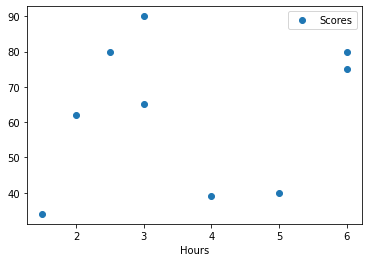

In [4]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()

In [5]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

3.6666666666666665 62.77777777777778


In [6]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,3.0,90,-0.666667,27.222222,-18.148148,0.444444,741.049383
1,2.5,80,-1.166667,17.222222,-20.092593,1.361111,296.604938
2,6.0,75,2.333333,12.222222,28.518519,5.444444,149.382716
3,4.0,39,0.333333,-23.777778,-7.925926,0.111111,565.382716
4,2.0,62,-1.666667,-0.777778,1.296296,2.777778,0.604938
5,1.5,34,-2.166667,-28.777778,62.351852,4.694444,828.160494
6,3.0,65,-0.666667,2.222222,-1.481481,0.444444,4.938272
7,5.0,40,1.333333,-22.777778,-30.370370,1.777778,518.827160
8,6.0,80,2.333333,17.222222,40.185185,5.444444,296.604938


In [7]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

54.33333333333333 22.500000000000004 3401.555555555556


In [8]:
correlation = summation_x_y / (summation_x_squared *
summation_y_squared)**0.5
correlation

0.1963976588154831

In [10]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [12]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [13]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

1.5811388300841898 19.440952067323007


In [14]:
m = correlation * (std_deviation_y / std_deviation_x)
m

2.414814814814814

In [15]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

53.92345679012346

In [17]:
df["y_prediction"] = m * df["Hours"] + c
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,3.0,90,-0.666667,27.222222,-18.148148,0.444444,741.049383,61.167901
1,2.5,80,-1.166667,17.222222,-20.092593,1.361111,296.604938,59.960494
2,6.0,75,2.333333,12.222222,28.518519,5.444444,149.382716,68.412346
3,4.0,39,0.333333,-23.777778,-7.925926,0.111111,565.382716,63.582716
4,2.0,62,-1.666667,-0.777778,1.296296,2.777778,0.604938,58.753086
5,1.5,34,-2.166667,-28.777778,62.351852,4.694444,828.160494,57.545679
6,3.0,65,-0.666667,2.222222,-1.481481,0.444444,4.938272,61.167901
7,5.0,40,1.333333,-22.777778,-30.370370,1.777778,518.827160,65.997531
8,6.0,80,2.333333,17.222222,40.185185,5.444444,296.604938,68.412346


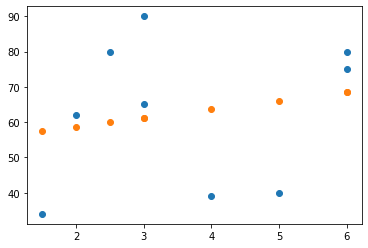

In [18]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()